<center><img src="./../data/besm.png" alt="In the name of Allah" width="150"></center>

<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>تمرین اول - درس پردازش زبان‌های طبیعی</center>
<center style ='font-family: "B Lotus";'>ترم ۱۴۰۱۱ - دانشکده مهندسی کامپیوتر</center>
<hr>
<center style ='font-family: "B Lotus";'>محمدحسین موثقی‌نیا</center>
<center style ='font-family: "B Lotus";'>۴۰۰۲۰۰۹۱۹</center>
<hr>

<div style="direction:rtl; font-family: 'B Lotus';">نصب و فراخوانی کتابخانه‌های مورد نیاز:</div>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install hazm
!pip install wordcloud_fa

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
# from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import random

<div style="direction:rtl; font-family: 'B Lotus';">تعریف الفباهای مورد نیاز، شامل موارد:</div>
<ul style="direction:rtl; font-family: 'B Lotus';">
  <li>الفبای زبان فارسی</li>
  <li>علائم سجاوندی</li>
  <li>اعداد فارسی و انگلیسی</li>
  <li>لیست ایموجی&zwnj;ها &laquo;از این <a href="https://unicode.org/Public/emoji/15.0/" rel="noopener noreferrer" target="_blank">لینک</a> استفاده شده است&raquo;</li>
</ul> 

In [45]:
persian_alphabet = ["آ","ا","ب","پ","ت","س","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","ل","م","ن","و","ه","ی"]
decorativeـsigns = [" ", ",", ":", "؛", "|", "\\", "*", " ", "٬", "!", "؟", "?", "(", ")", ".", "،"]
persian_numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
english_numbers = ["۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

emoji_df = pd.read_csv('./../data/emoji_df.csv')

emoji_df_single = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])
emoji_df_multiple = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])

j = 0
k = 0
for i, code in enumerate(emoji_df['codepoints']):
    if len(code.split()) > 1:
        emoji_df_multiple.loc[j] = emoji_df.loc[i]
        j += 1
    else:
        emoji_df_single.loc[k] = emoji_df.loc[i]
        k += 1

emoji_df

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
4576,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
4577,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
4578,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
4579,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [46]:
emoji_df_single

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
1315,🏁,chequered flag,Flags,flag,1F3C1
1316,🚩,triangular flag,Flags,flag,1F6A9
1317,🎌,crossed flags,Flags,flag,1F38C
1318,🏴,black flag,Flags,flag,1F3F4


In [47]:
emoji_df_multiple

,emoji,name,group,sub_group,codepoints
0,☺️,smiling face,Smileys & Emotion,face-affection,263A FE0F
1,😶‍🌫️,face in clouds,Smileys & Emotion,face-neutral-skeptical,1F636 200D 1F32B FE0F
2,😶‍🌫,face in clouds,Smileys & Emotion,face-neutral-skeptical,1F636 200D 1F32B
3,😮‍💨,face exhaling,Smileys & Emotion,face-neutral-skeptical,1F62E 200D 1F4A8
4,😵‍💫,face with spiral eyes,Smileys & Emotion,face-unwell,1F635 200D 1F4AB
...,...,...,...,...,...
3256,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
3257,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
3258,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
3259,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [55]:
emoji_alphabet_single = emoji_df_single['emoji']
emoji_alphabet_multiple = emoji_df_multiple['emoji']
emoji_alphabet = emoji_df['emoji']
len(emoji_alphabet), len(emoji_alphabet_single), len(emoji_alphabet_multiple)

(4581, 1320, 3261)

<div style="direction:rtl; font-family: 'B Lotus';">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<ul style="direction:rtl; font-family: 'B Lotus';">
  <li>حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</li>
  <li>حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</li>
</ul> 

In [56]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r', encoding='utf8')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [53]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

comments_data = [c[2] for c in data]
print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl; font-family: 'B Lotus';">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl; font-family: 'B Lotus';">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [57]:
def get_comments_with_emoji(comments):
    comment_texts = []
    for comment in comments:
        for emoji in emoji_alphabet:
            if type(comment) == str:
                if emoji in comment:
                    comment_texts.append(comment)
                    break
    return comment_texts

<div style="direction:rtl; font-family: 'B Lotus';">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم و در نهایت در فایل <code>comments_with_emoji.txt</code> ذخیره می کنیم. </div>

In [58]:
comments_with_emoji = get_comments_with_emoji(comments_data)

f = open("./../result/comments_with_emoji.txt", "w", encoding='utf8')
for comment in comments_with_emoji:
    f.write(f"{comment}\n")
f.close()

len(comments_with_emoji)

KeyboardInterrupt: 

<div style="direction:rtl; font-family: 'B Lotus';">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [124]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl; font-family: 'B Lotus';">تابع نمایش چند مورد اول لیست</div>

In [125]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list, "sep" is the seperator of printing results
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl; font-family: 'B Lotus';">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl; font-family: 'B Lotus';">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [126]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in comments_with_emoji:
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

In [127]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17335
 1	❤	14646
 2	👌	12692
 3	👍	9942
 4	😂	6895
 5	😘	4838
 6	👏	4400
 7	🤩	3413
 8	🤣	3017
 9	🥰	2950
10	♥	2912
11	🌹	2441
12	😭	2334
13	😊	2122
14	🙏	2095
15	💜	1872
16	💙	1769
17	😁	1599
18	💖	1547
19	😅	1119
---------------------
The percentage of emojis in the text compared to the total emojis: [49.63%]


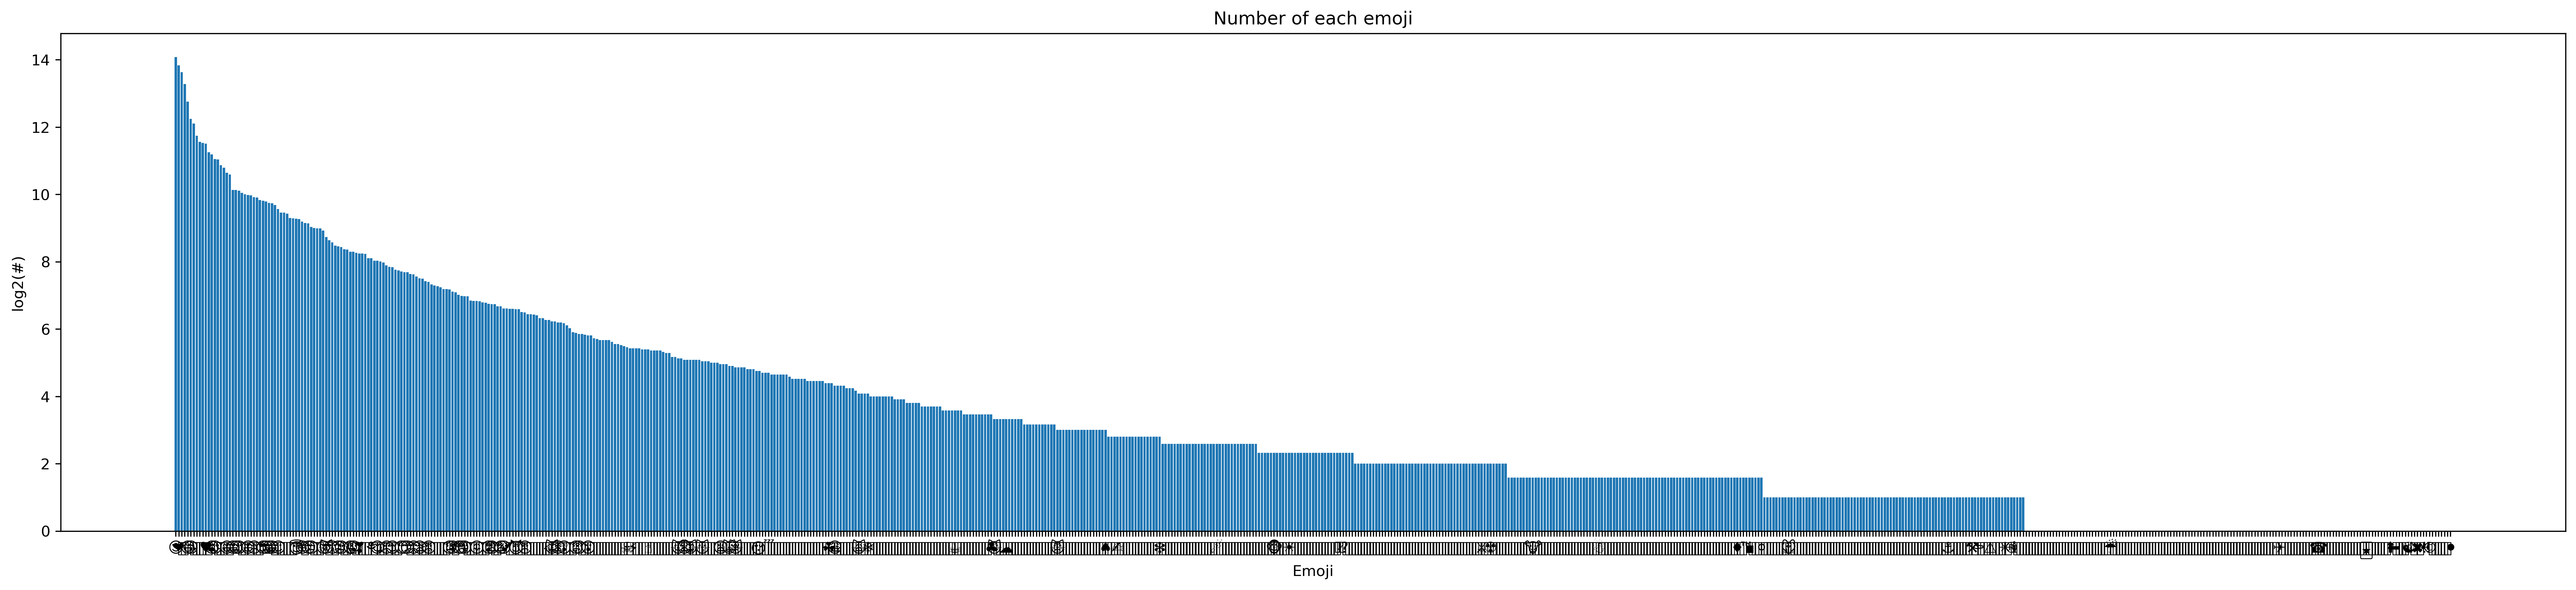

In [134]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ نرمال‌سازی</h2>

<div style='direction:rtl;font-family: "B Lotus";'>یک کلاس مجزا تعریف شده است که از کلاس <code>Normalizer</code> کتابخانه <code>hazm</code> ارث بری می&zwnj;کند. در این کلاس توابع زیر اضافه شده&zwnj;اند:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>تابع <code>__init__</code> صرفا به این منظور بازنویسی شده است که تابع <code>aug_data_init</code> را صدا بزند تا محتوای فایل مورد نیاز در متغیرها ذخیره شود. همچنین الفباهای مورد نیاز را مقدار دهی می کند.</li>
  <li>تابع <code>aug_data_init</code> فایلی را می&zwnj;خواند و در یک دیکشنری ذخیره می&zwnj;کند. این فایل غلط های متداولی که در متن وجود داشته است را در خود دارد و شکل صحیح آن را نوشته است و دیکشنری ساخته شده برهمین اساس می&zwnj;باشد.</li>
    <li>تابع <code>add_space_between_emoji_and_text</code> به منظور ایجاد فاصله میان متن و ایموجی‌ها می‌باشد.</li>
    <li>تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن را شمارش کرده و درصورتی که اختلاف تعداد آن‌ها با تعداد کاراکتر‌های غیر ایموجی متن بیش از <code>threshold</code> مشخصی باشد، از آن <code>threshold</code> به بعد، اجازه درج ایموجی را نمی‌دهد.</li>
  <li>تابع <code>my_normalizer</code> ابتدا خود تابع <code>normalize</code> مربوط به کتابخانه <code>hazm</code> را صدا می کند و خروجی آن را گرفته و تغییرات لازم را متناسب با دیکشنری ای که توسط تابع <code>aug_data_init</code> مقدار دهی شده است را اعمال می&zwnj;کند تا این خطاها نیز رفع شود.</li>
</ul>

In [16]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self, persian_alphabet, emoji_alphabet):
        super().__init__()
        self.aug_data_init()
        self.persian_alphabet = persian_alphabet
        self.emoji_alphabet = emoji_alphabet
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r', encoding='utf8')
        self.aug_data = f.readlines()
        f.close()
    
    def add_space_between_emoji_and_text(self, sent):
        res_sent = ''
        for i in range(len(sent)):
            if i+1 < len(sent):
                if (sent[i] in self.persian_alphabet and sent[i+1] not in self.persian_alphabet) or \
                    (sent[i] not in self.persian_alphabet and sent[i+1] in self.persian_alphabet) or \
                    (sent[i] not in self.persian_alphabet and sent[i+1] not in self.persian_alphabet):
                    res_sent += sent[i] + ' '
                else:
                    res_sent += sent[i]
            else:
                res_sent += sent[i]
        return res_sent
    
    
    def normalize_emoji_len(self, text, threshold=300):
        emoji_num = 0
        persian_num = 0
        for t in text:
            if t not in self.persian_alphabet:
                emoji_num += 1
            elif t in self.persian_alphabet:
                persian_num += 1
        res_text = ''
        if emoji_num > persian_num + threshold:
            j = 0
            for i, t in enumerate(text):
                if t not in self.persian_alphabet:
                    j += 1
                if (j < persian_num + threshold and t in self.persian_alphabet) or (not (t in self.persian_alphabet)):
                    res_text += t
                
        else:
            res_text = text
        
        return res_text
    
    
    def my_normalizer(self, text):
        text = self.add_space_between_emoji_and_text(text)
        text = self.normalize_emoji_len(text)
        text = self.normalize(text)
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

In [17]:
normalizer = MyNormalizer(persian_alphabet, emoji_alphabet)

In [18]:
test_set = ["واقعااااا", "عاااالییییی", "عالیهههه", 'خداروششششکر', 'دم سازندش گرم😊', 'وانیامم🥳🥳👏']
for i, t in enumerate(test_set):
    print(f'{i+1}\tBefore: {t}\t\tAfter: {normalizer.my_normalizer(t)}')

1	Before: واقعااااا		After: واقعا
2	Before: عاااالییییی		After: عالی
3	Before: عالیهههه		After: عالیه
4	Before: خداروششششکر		After: خداروشکر
5	Before: دم سازندش گرم😊		After: دم سازندش گ رم 😊
6	Before: وانیامم🥳🥳👏		After: وانیامم 🥳 🥳 👏


<div style='direction:rtl;font-family: "B Lotus";'>پیش پردازش اولیه متن:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
  <li>فقط کامنت‌های انتخاب می‌شوند که حتما متن فارسی نیز داشته باشند</li>
</ul>  

In [138]:
comments = []
for comment in tqdm(comments_with_emoji):
    for c in persian_alphabet:
        if c in comment:
            comments.append(comment.replace("&#039;", "\'").replace('\n', '').strip().split())
            break

print(f"Comments number: {len(comments)}")
head_list(comments, sep='\n')

100%|█████████████████████████████████████████████████████████████████████████| 91974/91974 [00:00<00:00, 218784.23it/s]

Comments number: 87378
['توی', '۸', 'ساعت', 'مهلت', 'فیلم', '۲', 'بار', 'این', 'فیلم', 'بی', 'نظیر', 'را', 'دیدم،', 'واقعیت', 'جامعه', 'و', 'واقعا', 'و', 'به', 'شدت', 'با', 'احساساتم', 'بازی', 'شد،', 'حتما', 'پیشنهاد', 'میکنم.', 'کاش', 'بیشتر', 'از', 'این', 'فیلم', 'حمایت', 'میشد.', 'با', 'فیلم', 'های', 'هالیوودی', 'برابری', 'میکرد🤣🤣🤣']
['ارزش', 'دیدن', 'داره👌']
['پسندیدم', '👍']
['عااااااااالی', 'بود', '.', 'با', 'بازی', 'آقای', 'درخشانی', 'عزیز', 'عالی', 'ترم', 'شد', '.', 'خیلی', 'قشنگ', 'بود.لذت', 'بردم.👏👏👏']
['خیلی', 'خوب', 'بود👌👌']
['خوب', 'بود', '👏❤']


<div style='direction:rtl;font-family: "B Lotus";'>نرمال‌سازی به کمک تابع <code>my_normalizer</code> انجام می شود که شامل بخش‌های زیر می‌باشد:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>اجرای تابع <code>normalizer</code> کتابخانه <code>hazm</code></li>
  <li>با استفاده از تابع <code>add_space_between_emoji_and_text</code> در مواردی که بین متن و ایموجی فاصله‌ای وجود ندارد، فاصله ایجاد می کند.</li>
    <li>با استفاده از تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن نرمالایز می‌شود.</li>
  <li>بعضی از اشتباهات یا حالت‌هایی که در متن به صورت محاوره‌ای استفاده می‌شود، اصلاح می‌شود.</li>
</ul>  

In [139]:
comments_normalized = [[normalizer.my_normalizer(y) for y in x] for x in tqdm(comments)]

100%|████████████████████████████████████████████████████████████████████████████| 87378/87378 [02:43<00:00, 533.58it/s]


In [141]:
for x in random.sample(comments_normalized, 50):
    print(' '.join(x))

😂 خیلی خوب بود
فوقالعاده بود 👏 👏 👏 👏
عالیه 🤩 🤩 🤩
فراتر تر از عالی حتما ببینید 😍 😍 😍
عالی بود مخصوصا اینکه دوبله اش کردن حرف نداشت 😘 😘
عالی بود واقعا بعد چند وقت بالاخره ی فیلم خوب دیدم 👌 👌
عالیه فیلم فوق العاده ای هست بی نظیره 😍 😍 😍 😍 😍 ❤
بسیار زیبا بود 🌷
خیلی خنده دار و باحال بود 🤣 🤣 عالی
خیلی خیلی عالی بود ❤ 😘 😘 😘
خیلی قشنگه 😍
چه بازی زیبایی داشت خانم ساره رشیدی 👌
من این فیلم رو ۴صبح دیدم فوق العاده بود و حیف که فیلمه ‌دیگه ای به زیبایی این الان ندارم ببینم خواب از چشمام پرید عالیسبود 👌
اونی که گفت چرا از کوکو اصکی رفته یک اینکه نرفته دو اینکه اگه قرار بود کسی اصکی بره کوکو چند سال بعد از این ساخته شده چطوری میتونه قبل از اینکه کوکو بیاد از کوکو اصکی رفته باشه 😐 😐 😐
عالی بود، من خوشم اومد 😘
چرا تو فیلما همیشه بچه اولیه دختر است دومیه پسر و اخریه دختر و همیشه هم غیر قابل کنترل هستند 😂
چرت چرت چرت چرت خیلی خیلی چرت 😂 😂
پرچم بالاست بنازم ایران ♥️
خیلی قشنگه حتما ببینین 😍
به نظر من که خیلی سریال قشنگی هست درسته هنوز نیومده ولی از بازیگرای فوق العاده ای که توی سریال هست قطعا سریال قشنگی خ

<h2 style='direction:rtl;font-family: "B Lotus";'>§ جمله‌بندی</h2>

In [67]:
comments_sentences = [hazm.sent_tokenize(' '.join(x)) for x in tqdm(comments_normalized)]

100%|█████████████████████████████████████████████████████████████████████████| 86365/86365 [00:00<00:00, 245746.77it/s]


In [68]:
for x in random.sample(comments_sentences, 50):
    print(' ### '.join(x))

خیلی قشنگ بود ❤️
خیلی فیلم عالی هست به قول داش مجید سوزوکیایول ایول ده نمکیو ایول 😙
عالی بود ☹ چقدر دلم خواست
عالی بود نیکخواه رو میدیدم منفجر میشدم 😄 😄 😄
عالی بود 👍 👍 👍 👍 👍
خوب بود 🤔 🤔
فیلمیه که واقعا ارزش دیدن داره 😍
عالی بود ♥️♥️♥️♥️♥️👏 👏 👏 👏 👏 👏 👏
عالیه 😘 😘 😘
کمدی قشنگی بود 😂 😂 😂 😂 😂 فیلم خوبی بود ولی وحشت نداشت …🤦‍♀️🤦‍♀️🤦‍♀️
دکتر روحانی امیر علی رو سیو میکرد بعد خودش رای میداد بره بیرون!!!!!!!!!!!! ### 😂
عالی است 😍 😍 😍 😍 😍 🌹 🌹 🌹 🌹 🌹 🌹 🤩 🤩 🤩 🤩⚘
وای محشر بود 😭
عالی خیلی خوبه 🤩
خیلی بامزه بود ☺ 👘 👏 👏 👏 👏 👆
من خیلی دوستش دارم و چند بار دیدم ، خیلی خوب بود. ### ❤ 👍 👌🏻💕 💕 ❣ ❣ ❣
خیلی قشنگ بود 💜
باورم نمیشه یک گل پژمان جمشیدی توی عمرش زد این دفعه بجای این که بهش کمک کنه باعث شد که خنجر از پشت بخوره 😂 😂 😂 😂 😂
خیلی عالی بود 😍
عالی بود اون سکانس که خسرو برای اولین بار شیر رو دید خیلی باحال بود 😂 😂 😂
بهرام افشاری 🤩 🤩
عالی و درجه یک بود 👍 👍 👍
خیلی زیبا و با نشاط امید در یه کلام فیلمی دقیقا انگیزشی هیچ وقت دیر نیست . ### فقط لازمه بدونی که میتونی ♥️🖤🫀
آموزنده و اجتماعی  …. ### 👏 👏
خیلی خیلی خوب

<h2 style='direction:rtl;font-family: "B Lotus";'>§ توکنیزیشن</h2>

In [56]:
comments_tokens = [[hazm.word_tokenize(sent) for sent in sents] for sents in tqdm(comments_sentences)]

100%|█████████████████████████████████████████████████████████████████████████| 86365/86365 [00:00<00:00, 125602.65it/s]


In [57]:
for x in random.sample(comments_tokens, 50):
    print(x)

[['خیلی', 'عالی', '👌👌👌👌']]
[['دیگه', 'واقعا', 'مسخره', 'شده', 'خدایش', 'مثل', 'فیلم', 'هندی', 'ها', 'شده', 'طرف', 'یک', 'ساعت', 'ماشینش', 'پشتکا', 'کش', 'میخوره', 'همینجوری', 'هی', 'میره', 'مرده', 'هاش', 'زنده', 'شدن', 'لابد', 'پنجاه', 'نسل', 'بعد', 'از', 'ماها', 'فکر', 'کنم', 'سریع', 'و', 'خشن', 'FF', '۵۱۲۰', 'واسه', 'نوادگان', 'ما', 'و', 'خودشان', 'همچنان', 'در', 'دست', 'ساخت', 'باشه', 'و', 'در', 'اون', 'جا', 'با', 'مریخی', 'ها', 'مسابقه', 'میدن', 'من', 'فکر', 'میکنم', 'کارگردان', 'این', 'فیلم', 'دلش', 'نمیاد', 'پایان', 'واسه', 'این', 'فیلم', 'بذاره', 'یا', 'احتمالا', 'بلد', 'نیست', 'تمامش', 'کنه', '😆']]
[['فیلم', 'خیلی', 'خوبی', 'بود', '،', 'البته', 'من', 'همشو', 'گریه', 'کردم', '🤦\u200d♂️']]
[['بهرام', 'عالی', '👌']]
[['وایی', 'اگه', 'امیر', 'مقاره', 'بازی', 'کنه', 'عالی', 'میشه🥺🥳']]
[['عالی', 'بود', 'من', 'که', 'خوشم', 'اومد', '👍👍']]
[['بهترین', 'سریالی', 'که', 'تو', 'عمرم', 'دیدم\u200c', '.'], ['دیگه', 'هیچوقت', 'نتونستم', 'سریالی', 'به', 'این', 'خوبی', 'پیدا', 'کنم', 'که', 'واقعا

<h2 style='direction:rtl;font-family: "B Lotus";'>§ تحیلی بسامد</h2>

In [59]:
from nltk import FreqDist
import itertools
import pandas as pd

tokens = list(itertools.chain(*itertools.chain(*comments_tokens)))

dataframe = {}

data = FreqDist(tokens).most_common(50)
     

freq_analysis = pd.DataFrame(data, columns=['token', 'freq'])  
freq_analysis

,token,freq
0,عالی,43377
1,بود,43027
2,خیلی,28972
3,و,15170
4,فیلم,14350
5,این,10258
6,که,9434
7,از,8986
8,من,8609
9,.,8082


In [60]:
print ('%-16s' % 'Number of words', '%-16s' % len(tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg=np.sum([len(word) for word in tokens])/len(tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  715203          
Number of unique words 41106           
Average word length 3.897647241412578
Longest word     ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️♥️♥️♥️♥️♥️♥️💓💙💙💙💚💚💚💛💛💛💛🧡🧡🧡🧡❤️❤️❤️❤️💖💖💖💓💓💓💞💞💞💕💕💕💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💚💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛💛🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡🧡❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💝💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💕💞💞💞️


In [ ]:
wordcloud = WordCloudFa(persian_normalize=True, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
image.show()

In [5]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


In [6]:
genres = ["drama", "war", "adventure", "sci-fi", "romance", 
          "horror", "mystery", "family", "musical", "talk-show", 
          "short", "reality-tv", "history", "action", "fantasy", 
          "comedy", "western", "crime", "thriller", "sport", 
          "documentary", "music", "religious", "concert", 
          "biography", "theatre"]

num = {}
for m in genres:
    num[m] = 0
for m in movies["genre"]:
    num[m] += 1
num

{'drama': 752,
 'war': 82,
 'adventure': 483,
 'sci-fi': 113,
 'romance': 150,
 'horror': 200,
 'mystery': 165,
 'family': 234,
 'musical': 49,
 'talk-show': 70,
 'short': 152,
 'reality-tv': 35,
 'history': 111,
 'action': 569,
 'fantasy': 118,
 'comedy': 415,
 'western': 28,
 'crime': 381,
 'thriller': 236,
 'sport': 50,
 'documentary': 228,
 'music': 30,
 'religious': 42,
 'concert': 18,
 'biography': 208,
 'theatre': 24}

In [17]:
num['drama'] + num['war'] + num['adventure'] + num['sci-fi'] + num['romance'] \
+ num['horror'] + num['mystery'] + num['family'] + num['musical'] + num['talk-show'] \
+ num['short'] + num['reality-tv'] + num['history'] + num['action'] + num['fantasy'] \
+ num['comedy'] + num['western'] + num['crime'] + num['thriller'] + + num['sport'] \
+ num['documentary']


4621